#선형대수 파이썬-1

##1.벡터 및 행렬 표현

In [ ]:
import numpy as np  ##( numpy 모듈을 호출하기 위해 필요한 명령어 )

###벡터와 연산

In [ ]:
u = np.array([1,2,3])
print(u)

[1 2 3]


In [ ]:
v=np.array([4,5,6])
print(v)

[4 5 6]


In [ ]:
print("두","벡터간의","합:",u+v)
print("두","벡터간의","차:",u-v)
print("두","벡터간의","내적:",np.dot(u,v))
print("두","벡터간의","외적:",np.cross(u,v))

두 벡터간의 합: [5 7 9]
두 벡터간의 차: [-3 -3 -3]
두 벡터간의 내적: 32
두 벡터간의 외적: [-3  6 -3]


###행렬과 연산

In [ ]:
A = np.array([[2,-7,3],[3,4,5],[6,1,4]])
B = np.array([[1,4,5],[4,-1,3],[2,5,-1]])

print(A)
print()
print(B)

[[ 2 -7  3]
 [ 3  4  5]
 [ 6  1  4]]

[[ 1  4  5]
 [ 4 -1  3]
 [ 2  5 -1]]


In [ ]:
print(A+B)   # 두 행렬간의 합
print()
print(np.matmul(A,B)) # 두 행렬간의 곱

[[ 3 -3  8]
 [ 7  3  8]
 [ 8  6  3]]

[[-20  30 -14]
 [ 29  33  22]
 [ 18  43  29]]


In [ ]:
print(np.transpose(A))  # 전치행렬
print()
print(np.linalg.det(A))  # 행렬식
print()
print(np.linalg.inv(A))  # 역행렬

[[ 2  3  6]
 [-7  4  1]
 [ 3  5  4]]

-166.99999999999991

[[-0.06586826 -0.18562874  0.28143713]
 [-0.10778443  0.05988024  0.00598802]
 [ 0.1257485   0.26347305 -0.17365269]]


##2. Projection operator

### (1) 2차원 R^2상에 x,y좌표축으로의 projection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x축에 대한 사영 행렬
P_x = np.array([[1, 0],
                [0, 0]])

# y축에 대한 사영 행렬
P_y = np.array([[0, 0],
                [0, 1]])

In [ ]:
print(P_x)
print(P_y)

[[1 0]
 [0 0]]
[[0 0]
 [0 1]]


In [ ]:
a = np.array([1,4])

# x축으로 사영
projected_vector_x = np.dot(P_x,a)

# y축으로 사영
projected_vector_y = np.dot(P_y,a)

print(projected_vector_x)
print(projected_vector_y)

[1 0]
[0 4]


###(2) 직선 y=mx위로의 projection

In [ ]:
import numpy as np

def proj_onto_line(m):

    # 직선의 방향 벡터를 열 벡터로 표현
    direction_vector = np.array([1, m]).reshape(-1, 1)

    P = (1 / (1 + m**2)) * np.dot(direction_vector, direction_vector.T)

    return P

# 주어진 벡터
vector = np.array([5, 3])

# 직선 y = mx에 대한 사영 연산자 행렬 계산
m=6
P_line = proj_onto_line(6)

# 벡터를 주어진 직선에 대해 사영시킵니다.
projected_vector_line = np.dot(P_line, vector)

print("주어진 벡터 [5, 3]을 직선 y = 6x에 대해 사영한 결과:", projected_vector_line)


주어진 벡터 [5, 3]을 직선 y = 6x에 대해 사영한 결과: [0.62162162 3.72972973]


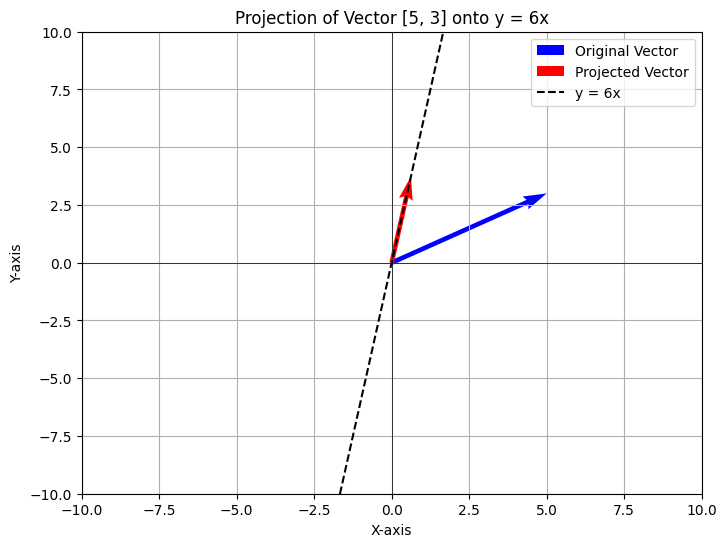

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, projected_vector_line[0], projected_vector_line[1], angles='xy', scale_units='xy', scale=1, color='red', label='Projected Vector')
x_values = np.linspace(-3, 3, 100)
y_values = m * x_values
plt.plot(x_values, y_values, color='black', linestyle='--', label='y = 6x')

plt.xlim(-10, 10)
plt.ylim(-10,10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Projection of Vector [5, 3] onto y = 6x')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


###(3)n차원에서의 Projection

In [ ]:
import numpy as np

def pn(vectors,Y):
  basis = []
  proj = np.zeros(len(Y))
  for i in range(1,len(vectors)+1):
    vector = np.array(vectors[i-1])
    if (i==1):
      basis.append(vector)
    else :
      for k in range(0,i-1):
        vector = vector - (np.dot(vector,basis[k])/np.dot(basis[k],basis[k]))*basis[k]
      basis.append(vector)
  for i in range(0,len(basis)):
    proj = proj + (np.dot(Y,basis[i])/np.dot(basis[i],basis[i]))*basis[i]
  print(basis)
  print()
  return print(proj)


In [ ]:
pn([[1 , 5 , 8 , 7],[4 , 13 , 1 , 7],[7 , 8 , 10 , 5 ]],[1, 2 , 2 , -2])

[array([1, 5, 8, 7]), array([ 3.09352518,  8.4676259 , -6.25179856,  0.65467626]), array([ 5.0623027 ,  0.05890762,  2.23688129, -3.32169873])]

[ 2.23271804  0.92642936  1.30136986 -0.61083197]
